In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/encoded_car_data.csv')
print(df.head())

   diesel  gas  std  turbo  convertible  hardtop  hatchback  sedan  wagon  \
0     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
1     0.0  1.0  1.0    0.0          1.0      0.0        0.0    0.0    0.0   
2     0.0  1.0  1.0    0.0          0.0      0.0        1.0    0.0    0.0   
3     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   
4     0.0  1.0  1.0    0.0          0.0      0.0        0.0    1.0    0.0   

   4wd  ...  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
1  0.0  ...       88.6      2548.0       130.0       3.47       111.0   
2  0.0  ...       94.5      2823.0       152.0       2.68       154.0   
3  0.0  ...       99.8      2337.0       109.0       3.19       102.0   
4  1.0  ...       99.4      2824.0       136.0       3.19       115.0   

   carlength  carwidth  citympg  highwaympg    price  
0      168.8      64.1     21.0        27.0

In [3]:
X = df[['enginesize','horsepower','citympg','highwaympg']]
y = df['price']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
linear_model = Pipeline([
    ('scalar', StandardScaler()),
    ('model', LinearRegression())
])
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

In [6]:
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scalar', StandardScaler()),
    ('model', LinearRegression())
])
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

In [7]:
print("Linear Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_linear):.2f}")
print(f"R2: {r2_score(y_test, y_pred_linear):.2f}")

print("\nPolynomial Regression:")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly):.2f}")
print(f"R2: {r2_score(y_test, y_pred_poly):.2f}")

Linear Regression:
MSE: 16471505.90
R2: 0.79

Polynomial Regression:
MSE: 15247661.89
R2: 0.81


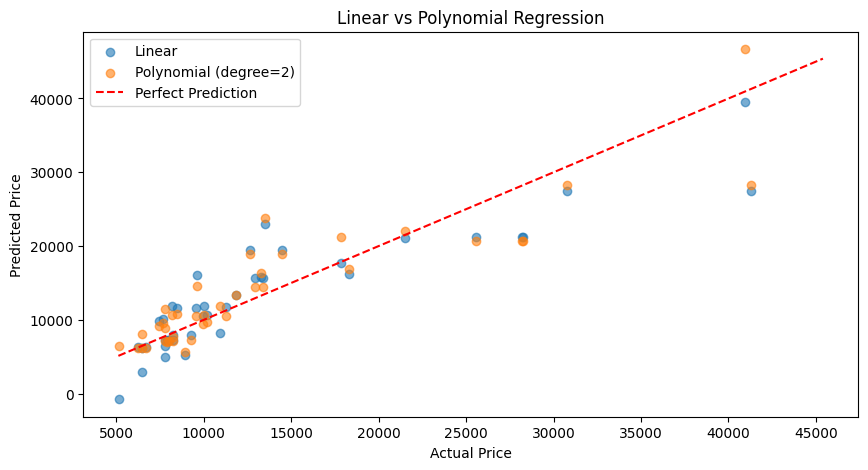

In [8]:
# Plot actual vs predicted

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_linear, label='Linear', alpha=0.6)
plt.scatter(y_test, y_pred_poly, label='Polynomial (degree=2)', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear vs Polynomial Regression")
plt.legend()
plt.show()